

**Aim** : *Votes Analysis*


1.   *Identify the restaurants with the highest and
lowest number of votes.*
2.   *Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.*


In [ ]:
import pandas as pd
import re
import string
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Dataset .csv'

df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
# Restaurants with the highest number of votes
highest_votes = df[df['Votes'] == df['Votes'].max()]

# Restaurants with the lowest number of votes
lowest_votes = df[df['Votes'] == df['Votes'].min()]

print("Restaurant(s) with the highest number of votes:")
print(highest_votes[['Restaurant Name', 'Votes']])

print("\nRestaurant(s) with the lowest number of votes:")
print(lowest_votes[['Restaurant Name', 'Votes']])


Restaurant(s) with the highest number of votes:
    Restaurant Name  Votes
728            Toit  10934

Restaurant(s) with the lowest number of votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]



Correlation between votes and aggregate rating: 0.31369058419541157


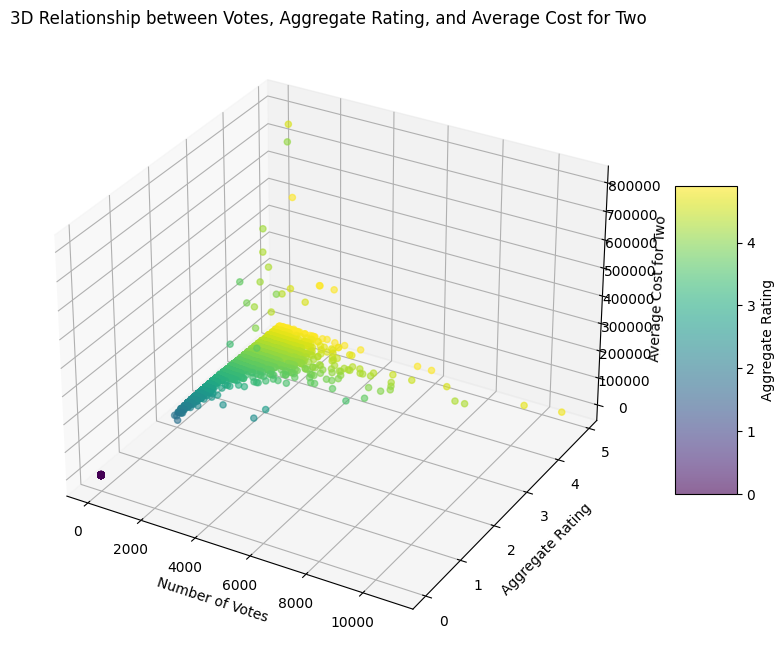

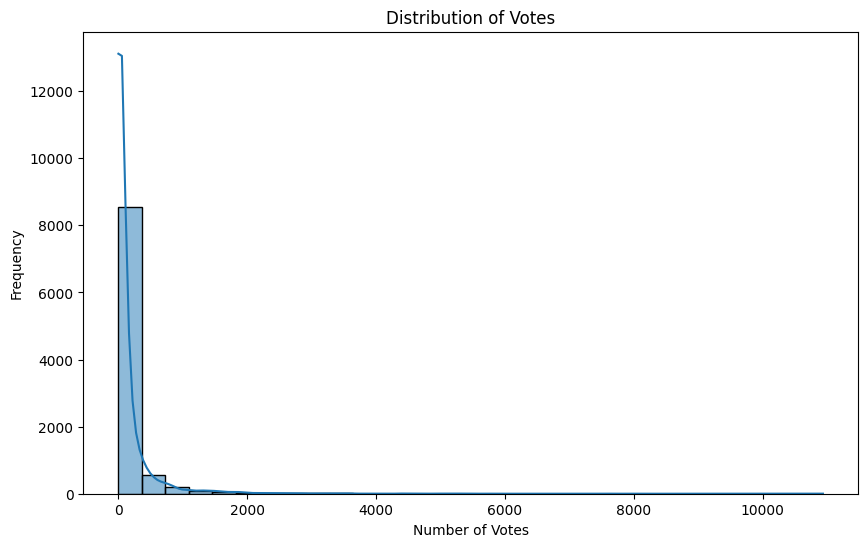

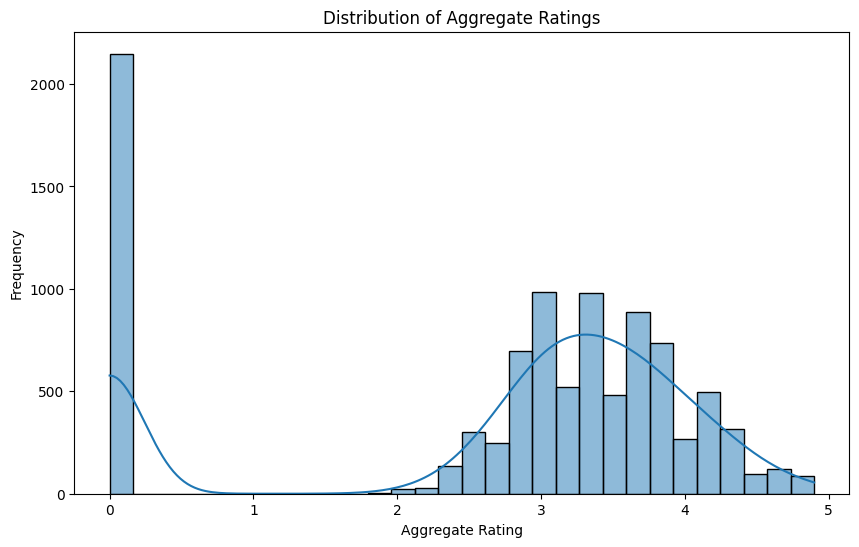

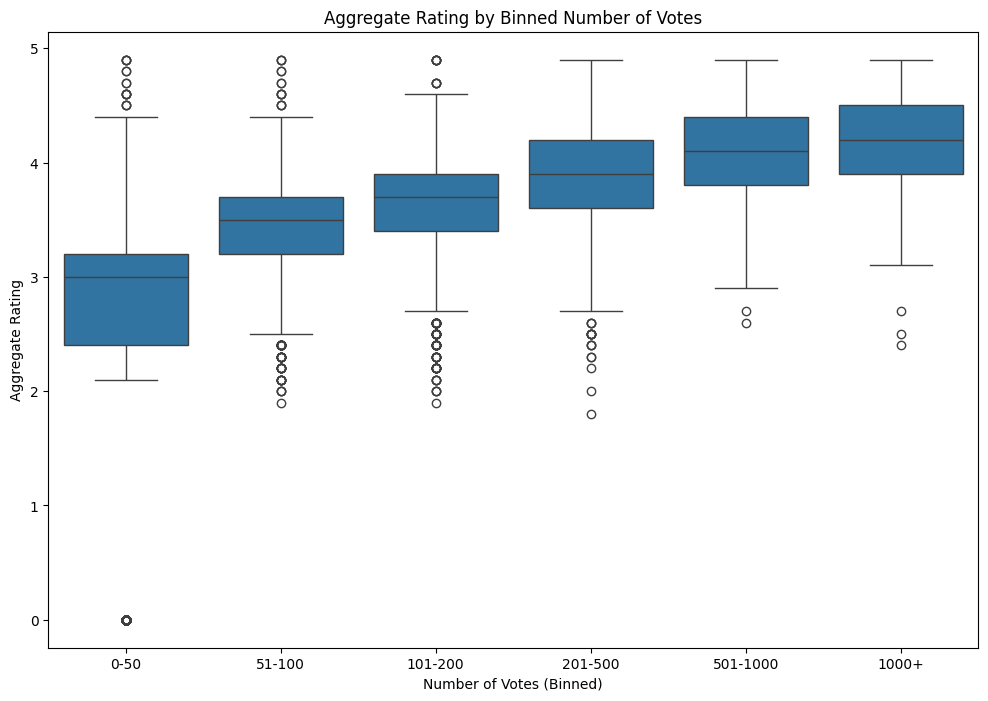

In [ ]:
# Analyzing if there is a correlation between the number of votes and the rating of a restaurant
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\nCorrelation between votes and aggregate rating: {correlation}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Votes'], df['Aggregate rating'], df['Average Cost for two'], c=df['Aggregate rating'], cmap='viridis', alpha=0.6)

ax.set_title('3D Relationship between Votes, Aggregate Rating, and Average Cost for Two')
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Aggregate Rating')
ax.set_zlabel('Average Cost for Two')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Aggregate Rating')

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Votes'], bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

df['Votes Binned'] = pd.cut(df['Votes'], bins=[0, 50, 100, 200, 500, 1000, df['Votes'].max()],
                             labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Votes Binned', y='Aggregate rating')
plt.title('Aggregate Rating by Binned Number of Votes')
plt.xlabel('Number of Votes (Binned)')
plt.ylabel('Aggregate Rating')
plt.show()

# Output Analysis

The correlation value of *\(0.3137\)* between votes and aggregate rating indicates a **POSITIVE** but moderate relationship between these two variables. Here's what this means:

1. **Direction**: The positive sign of the correlation coefficient means that as the number of votes increases, the aggregate rating tends to increase as well, and vice versa. In other words, restaurants with more votes generally have higher ratings.

2. **Strength**: The value *\(0.3137\)* suggests that the relationship between the number of votes and the aggregate rating is not very strong. A correlation coefficient can range from -1 to 1:
   - A value of 1 indicates a perfect positive correlation.
   - A value of -1 indicates a perfect negative correlation.
   - A value of 0 indicates no correlation.
   
   In this case, \(0.3137\) is closer to 0 than to 1, suggesting that while there is a positive relationship, it is not very strong.

3. **Practical Implication**: In practical terms, while there is some tendency for restaurants with more votes to have higher ratings, many other factors likely influence the ratings. The moderate correlation indicates that the number of votes is not a strong predictor of the aggregate rating by itself.

This suggests that while popular restaurants (in terms of votes) may generally be well-rated, it's not a strong enough relationship to make reliable predictions based solely on the number of votes. Other factors should also be considered when analyzing restaurant ratings.